Blackbody Spectrum
====
# Barry O'Donnell

## 6/10/2019

In this experiment, I will be using the Rayleigh-Jeans law and Planck's modified version, to determine the Blackbody spectrum.

The formulae that I will be using in this assignment are;
### $$ U(\nu,T) = \frac{8 \pi \nu^2}{c^3} kT $$
and,
### $$ U(\nu,T) = \frac{8 \pi h \nu^3}{c^3} \frac{1}{exp(h\nu/kT)-1} $$
Where;
* '$U$' is energy density ($J/m^3$),
* '$\nu$' is frequency ($Hz$),
* '$T$' is absolute temperature ($K$),
* '$h$' is Planck's constant ($6.63 x 10^{-34}$ $J s$)
* '$c$' is the speed of light ($3.0x10^8$ $m s^{-1}$),
* '$k$' is the Boltzmann constant ($1.38 x 10^{-23}$ $J K^{-1}$)

#### Task 1
I will first calculate the Rayleigh-Jean Law $U$ for $\nu = 10^{12}$ and $T = 2000K$. Following that I will plot a logarithmic graph where T is fixed and $\nu$ varies between $10^{11} - 10^{15}$.

#### Task 2 and 3
After doing that, I will use Plancks function to graph multiple $U$'s on the same plot, by varying Temperature and frequency, and compare this graph to the Rayleigh-Jeans

#### Task 4
Using the data obtained in the last part, the peak frequency will be taken from each $U$ and be used to calculate the constant in Wien's displacement law;
### $$ \lambda_{peak}T = Constant $$

#### Task 5
Finally, I will carry out a numerical integration of the Planck function for a few temperatures and compare this value to $T^4$.

In [1]:
## Importing modules to be called during assignment
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Defining constants that will be used throughout the assignment
k = 1.38 * 10**-23 ## Boltzmann constant
c = 3.0  * 10** 8  ## Speed of Light
h = 6.63 * 10**-34 ## Planck's constant

## Task 1

Observing the Energy density output from the Rayleigh-Jeans formula, where frequency is $10^{12} Hz$ and temperature is $2000K$.

In [3]:
vconst = 10**12
Tconst = 2000

## Breaking up Rayleigh-Jeans Law into smaller sums
sum1 = 8 * np.pi * k / c**3

U = sum1 * vconst**2 * Tconst

print('Energy density;\nU({0:4.1e},{1:4.0f})  = {2:5.2e} J/m^3'.format(vconst,Tconst,U))

Energy density;
U(1.0e+12,2000)  = 2.57e-20 J/m^3


## Task 2

Graphing the output of the Rayleigh-Jeans formula, assuming temperature is constant ($2000K$), and frequency is varying (between $10^{11}$ and $10^{15}$).

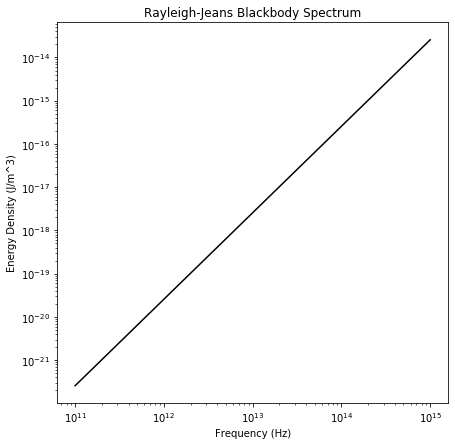

In [4]:
Tconst = 2000
sum1 = 8 * np.pi * k / c**3

## Amount of steps used
N = 60

## Array for energy density output
U_jeans = np.zeros(N)
## Frequency array from 10^11 to 10^15
v = np.linspace(10**11, 10**15, num=N)

## For loop to calculate energy density
for i in range(N):
    U_jeans[i] = sum1 * Tconst * v[i]**2

## Plot definitions
plt.figure(1,(7,7))
plt.plot(v, U_jeans, 'k')
plt.title('Rayleigh-Jeans Blackbody Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy Density (J/m^3)')

## Log scaled plot used to show exponential relationship
plt.semilogx()
plt.semilogy()

plt.show()

## Task 3

Graphing the Planck function and overlaying the Rayleigh-Jeans Law on it. 

The Planck function will use a range of temperatures (From $2000K$ to $6000k$), and the same frequency range as before.

The Rayleigh-Jeans function will be the same as the previous.

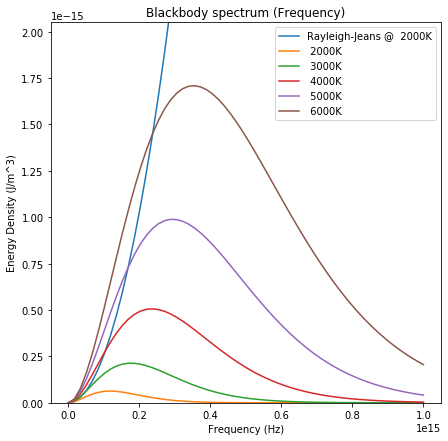

In [5]:
Tconst = 2000
sum1 = 8 * np.pi * k / c**3
sum2 = 8 * np.pi * h / c**3

## Amount of steps needed for; Frequecy, Temperature
N = 60
n = 5

## Initializing arrays for; Energy density, frequency, temperature
U_planck, U_jeans  = np.zeros(N), np.zeros(N)
v = np.linspace(10**10, 10**15, num=N)
T = np.linspace(2000, 6000, num=n)

## Begin plot definition
plt.figure(1, (7,7))

## For loop to calculate Rayleigh-Jeans Energy dens.
for i in range(N):
    U_jeans[i] = sum1 * Tconst * v[i]**2
    
plt.plot(v,U_jeans, label='Rayleigh-Jeans @ {0:5.0f}K'.format(Tconst))
    
## For loop to calculate Planck function with nested for loop to get frequency change per temp
for j in range(n):
    for i in range(N):
        sum3 = (np.exp((h*v[i]) / (k*T[j])) - 1)**(-1)
        
        U_planck[i] = sum2 * sum3 * v[i]**3 
        
    plt.plot(v,U_planck, label='{0:5.0f}K'.format(T[j]))

## Further plot definitions
plt.title("Blackbody spectrum (Frequency)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy Density (J/m^3)')
plt.ylim(0,np.max(U_planck)*1.2)
plt.legend()
    
plt.show(1)

We see that the Rayleigh-Jeans Law skyrockets rather fast and does not reflect the actual spectrum of the blackbody accurately quickly.

## Task 4

By finding the max of each energy density and finding the corresponding frequency, we can obtain Wien's Displacement Constant

2000K: 5.13e-03m.K  [1.17e+14 Hz] 
3000K: 5.13e-03m.K  [1.75e+14 Hz] 
4000K: 5.10e-03m.K  [2.35e+14 Hz] 
5000K: 5.10e-03m.K  [2.94e+14 Hz] 
6000K: 5.11e-03m.K  [3.52e+14 Hz] 


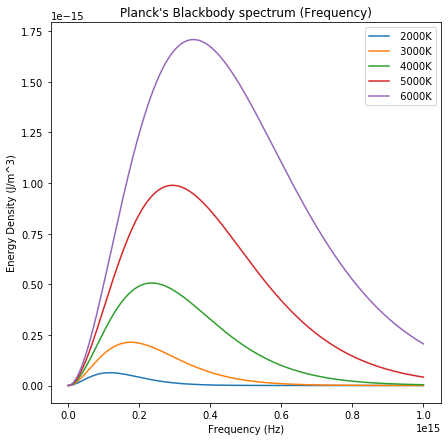

In [6]:
## Steps needed for; frequency, temp
N = 600
n = 5

## Initializing arrays for; Energy dens., freq, temp
U_planck = np.zeros(N)
v = np.linspace(10**11, 10**15, num=N)
T = np.linspace(2000, 6000, num=n)

## Begin plot definition and for loop with nested for loop for freq per temp
plt.figure(1, (7,7))
for j in range(n):
    for i in range(N):
        sum3 = 1/(np.exp((h*v[i]) / (k*T[j])) - 1)
        U_planck[i] = sum2 * sum3 * v[i]**3 
        
    ## Grab peak Energy dens. from array
    freq_peak = v[np.argmax(U_planck)]
    
    plt.plot(v, U_planck, label='{0:5.0f}K'.format(T[j]))
    
    ## Calculate and print Wien's Displacement Law constant
    print('{0:4.0f}K: {1:4.2e}m.K  [{2:4.2e} Hz] '.format(T[j], (c / freq_peak) * T[j], freq_peak))

## Further plot definitions
plt.title("Planck's Blackbody spectrum (Frequency)")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Energy Density (J/m^3)')
plt.legend()
plt.show(1)

The results of using the frequency dependent Planck's Law were not quite correct (Off by a factor of ~1.76), obtaining a value of $5.13x10^{-3} m.K$ as opposed to the expected $2.89^{-3}m.K$

I instead used a version of Planck's Law that is dependent on wavelength and observed the Blackbody Spectrum for wavelengths between $ 5x10^{-8}m $ and $ 2.5x10^{-6}m $. The formula in use here is;

### $$ U(\lambda, T) = \frac{2hc}{\lambda^5} \frac{1}{e^{h\nu/(\lambda k T)} - 1} $$

This formula was taken from (https://en.wikipedia.org/wiki/Wien%27s_displacement_law)

2000K: 2.90e-03m.K  [1.45e-06 m] 
3000K: 2.90e-03m.K  [9.67e-07 m] 
4000K: 2.90e-03m.K  [7.26e-07 m] 
5000K: 2.90e-03m.K  [5.81e-07 m] 
6000K: 2.90e-03m.K  [4.84e-07 m] 


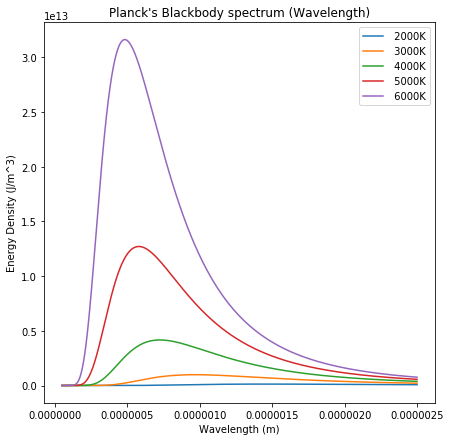

In [7]:
## Steps needed for; frequency, temp
N = 5000
n = 5

## Splitting large sum into multiple parts for easier troubleshooting
sum4 = 2 * h * c**2

## Initializing arrays for; Energy dens., wavelength, temp
U_planck = np.zeros(N)
lamb = np.linspace(5*10**-8, 2.5*10**-6, num=N) ## Specific wavelengths chosen post-original observation
T = np.linspace(2000, 6000, num=n)

## Begin plot definition and for loop with nested for loop for wavelength per temp
plt.figure(1, (7,7))
for j in range(n):
    for i in range(N):
        sum3 = 1/(np.exp((h*c) / (lamb[i]*k*T[j])) - 1)
        U_planck[i] = sum3 * sum4 / (lamb[i]**5)
        
    ## Finding the corresponding lambda to the peak of energy density
    lamb_peak = lamb[np.argmax(U_planck)]
        
    ## Calculate Wien's Displacement constant and show corresponding temperature and wavelength
    print('{0:4.0f}K: {1:4.2e}m.K  [{2:4.2e} m] '.format(T[j], (lamb_peak) * T[j], lamb_peak))    
    
    ## Plot Energy density v wavelength
    plt.plot(lamb, U_planck, label='{0:5.0f}K'.format(T[j]))
    
## Plot definitions
plt.title("Planck's Blackbody spectrum (Wavelength)")
plt.xlabel('Wavelength (m)')
plt.ylabel('Energy Density (J/m^3)')
plt.legend()
plt.show(1)

The result obtained from this version is more in line with the expected Wien's Constant of $2.89 x 10^{-3} m.K$.

## Task 5
Continuing on, I will be using a version of the rectangle rule to approximate the area under the energy density curve. I will then compare this approximating to $T^4$ to show a proportional relationship between the two quantities.

In [8]:
sum2 = 8 * np.pi * h / c**3

## Steps needed for; frequency, temp
N = 10000
n = 6

## Initializing arrays for; Energy dens., freq, temp
U_planck = np.zeros(N)
v = np.linspace(10**11, 10**17, num=N)
T = np.linspace(2000, 6000, num=n)

## Find constant seperation between 'v' values
##  There will always be a v[1] and v[0], as if there isn't, then
##  the curve would have no area, ie. a point
dv = (v[1]-v[0])

## Begin plot definition and for loop with nested for loop for freq per temp
for j in range(n):
    for i in range(N):
        sum3 = 1/(np.exp((h*v[i]) / (k*T[j])) - 1)
        U_planck[i] = sum2 * sum3 * v[i]**3 

    ## Multiplying the array of 'y' values by the constant dv
    ##  The resulting array is summed to calculate the area under the curve
    area = np.sum(U_planck * dv)
    
    ## Calculate and print T^4 proportionality
    print('Ratio of Area to Temp [@{0:4.0f}K] :- {1:4.2e}'.format(T[j], area/T[j]**4))

Ratio of Area to Temp [@2000K] :- 7.52e-16
Ratio of Area to Temp [@2800K] :- 7.52e-16
Ratio of Area to Temp [@3600K] :- 7.52e-16
Ratio of Area to Temp [@4400K] :- 7.52e-16
Ratio of Area to Temp [@5200K] :- 7.52e-16
Ratio of Area to Temp [@6000K] :- 7.52e-16


There is a clear relationship between the area under the curve of a blackbody spectrum and the temperature it is dependent on, and confirms the relationship stated in the Stefan-Boltzmann Law

### $$ A \propto T^4 $$